<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc" style="margin-top: 1em;"><ul class="toc-item"><li><span><a href="#Including-water-vapor-in-the-tropical-analysis" data-toc-modified-id="Including-water-vapor-in-the-tropical-analysis-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Including water vapor in the tropical analysis</a></span><ul class="toc-item"><li><span><a href="#Reading-a-netcdf-file" data-toc-modified-id="Reading-a-netcdf-file-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Reading a netcdf file</a></span><ul class="toc-item"><li><span><a href="#set-this-to-True-if-running-for-the-first-time" data-toc-modified-id="set-this-to-True-if-running-for-the-first-time-1.1.1"><span class="toc-item-num">1.1.1&nbsp;&nbsp;</span>set this to True if running for the first time</a></span></li><li><span><a href="#How-much-liquid-water-is-in-the-domain?" data-toc-modified-id="How-much-liquid-water-is-in-the-domain?-1.1.2"><span class="toc-item-num">1.1.2&nbsp;&nbsp;</span>How much liquid water is in the domain?</a></span></li></ul></li></ul></li><li><span><a href="#Plotting-three-$h_m$-profiles" data-toc-modified-id="Plotting-three-$h_m$-profiles-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Plotting three $h_m$ profiles</a></span><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#moist-static-energy-(J/kg)" data-toc-modified-id="moist-static-energy-(J/kg)-2.0.1"><span class="toc-item-num">2.0.1&nbsp;&nbsp;</span>moist static energy (J/kg)</a></span></li><li><span><a href="#zoom-in-on-bottom-1-km" data-toc-modified-id="zoom-in-on-bottom-1-km-2.0.2"><span class="toc-item-num">2.0.2&nbsp;&nbsp;</span>zoom in on bottom 1 km</a></span></li></ul></li></ul></li><li><span><a href="#Calculate-the-temperature-and-vapor-fluxes" data-toc-modified-id="Calculate-the-temperature-and-vapor-fluxes-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Calculate the temperature and vapor fluxes</a></span><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#As-expected,-vapor-transport-dominates-the-energy-flux-in-the-warm-marine-boundary-layer" data-toc-modified-id="As-expected,-vapor-transport-dominates-the-energy-flux-in-the-warm-marine-boundary-layer-3.0.1"><span class="toc-item-num">3.0.1&nbsp;&nbsp;</span>As expected, vapor transport dominates the energy flux in the warm marine boundary layer</a></span></li><li><span><a href="#Closer-examination-of-fluxes-at-800-m" data-toc-modified-id="Closer-examination-of-fluxes-at-800-m-3.0.2"><span class="toc-item-num">3.0.2&nbsp;&nbsp;</span>Closer examination of fluxes at 800 m</a></span></li><li><span><a href="#now-do-the-same-for-the-turbulent-fluxes-at-that-level-in-W/m^2" data-toc-modified-id="now-do-the-same-for-the-turbulent-fluxes-at-that-level-in-W/m^2-3.0.3"><span class="toc-item-num">3.0.3&nbsp;&nbsp;</span>now do the same for the turbulent fluxes at that level in W/m^2</a></span></li><li><span><a href="#But-there-are-some-gridcells-with-huge-flux-values" data-toc-modified-id="But-there-are-some-gridcells-with-huge-flux-values-3.0.4"><span class="toc-item-num">3.0.4&nbsp;&nbsp;</span>But there are some gridcells with huge flux values</a></span></li><li><span><a href="#So-what's-up-with-these-large-fluxes?" data-toc-modified-id="So-what's-up-with-these-large-fluxes?-3.0.5"><span class="toc-item-num">3.0.5&nbsp;&nbsp;</span>So what's up with these large fluxes?</a></span></li><li><span><a href="#Conclusion:-these-large-fluxes-are-coming-from-cloudy-grid-cells-with-coherent-updrafts" data-toc-modified-id="Conclusion:-these-large-fluxes-are-coming-from-cloudy-grid-cells-with-coherent-updrafts-3.0.6"><span class="toc-item-num">3.0.6&nbsp;&nbsp;</span>Conclusion: these large fluxes are coming from cloudy grid cells with coherent updrafts</a></span></li><li><span><a href="#Next:--joint-distributions" data-toc-modified-id="Next:--joint-distributions-3.0.7"><span class="toc-item-num">3.0.7&nbsp;&nbsp;</span>Next:  joint distributions</a></span></li><li><span><a href="#Writing-our-own-histogram-routine" data-toc-modified-id="Writing-our-own-histogram-routine-3.0.8"><span class="toc-item-num">3.0.8&nbsp;&nbsp;</span>Writing our own histogram routine</a></span></li><li><span><a href="#Now-redo-the-wvel,-T-scatterplot-as-a-2-d-histogram,-plotting-log10(counts)" data-toc-modified-id="Now-redo-the-wvel,-T-scatterplot-as-a-2-d-histogram,-plotting-log10(counts)-3.0.9"><span class="toc-item-num">3.0.9&nbsp;&nbsp;</span>Now redo the wvel, T scatterplot as a 2-d histogram, plotting log10(counts)</a></span></li></ul></li></ul></li></ul></div>

# Including water vapor in the tropical analysis

1.  What do the fluxes of sensible and latent heat look like for the tropical case?

1.  Drill down into the data using

    a.  Two dimensional histograms
    
    b.  images with normalized color pallettes

## Reading a netcdf file

1.  Fetch the netcdf file tropical.nc from my webserver (50 Mbytes)

In [1]:
import urllib.request
import numpy as np
from netCDF4 import Dataset
from matplotlib import pyplot as plt

Only download the data once -- set this to True if you need
this file, otherwise skip

data_download=False
### set this to True if running for the first time
if data_download:
    urllib.request.urlretrieve("http://clouds.eos.ubc.ca/~phil/docs/atsc500/tropical_subset.nc", 
                           "tropical_subset.nc")

In [2]:
from a500.utils.data_read import download
the_root = "http://clouds.eos.ubc.ca/~phil/docs/atsc500"
the_file =  "tropical_subset.nc"
out=download(the_file,root=the_root)

trying http://clouds.eos.ubc.ca/~phil/docs/atsc500/tropical_subset.nc
writing to: tropical_subset.nc

tropical_subset.nc already exists
and is 52116281 bytes
will not overwrite



In [3]:
def do_reynolds(array3d):
    """
        do a spatial-mean reynolds average of a 3d field array3d
        needs dimensions arranged as (z,y,x)
        returns avg(z),perturb(z,y,x)
    """
    avg=array3d.mean(axis=2).mean(axis=1)
    perturb=array3d.T - avg
    perturb=perturb.T
    return avg,perturb

2\.  Identify the file structure using ncdump

In [4]:
!ncdump -h tropical_subset.nc

netcdf tropical_subset {
dimensions:
	x = 100 ;
	y = 110 ;
	z = UNLIMITED ; // (112 currently)
	time = UNLIMITED ; // (1 currently)
variables:
	float x(x) ;
		string x:units = "m" ;
	float y(y) ;
		string y:units = "m" ;
	float z(z) ;
		string z:units = "m" ;
		string z:long_name = "height" ;
	float time(time) ;
		string time:units = "d" ;
		string time:long_name = "time" ;
	float p(z) ;
		string p:units = "mb" ;
		string p:long_name = "pressure" ;
	float U(time, z, y, x) ;
		string U:long_name = "X Wind Component" ;
		string U:units = "m/s" ;
	float V(time, z, y, x) ;
		string V:long_name = "Y Wind Component" ;
		string V:units = "m/s" ;
	float W(time, z, y, x) ;
		string W:long_name = "Z Wind Component" ;
		string W:units = "m/s" ;
	float PP(time, z, y, x) ;
		string PP:long_name = "Pressure Perturbation" ;
		string PP:units = "Pa" ;
	float TABS(time, z, y, x) ;
		string TABS:long_name = "Absolute Temperature" ;
		string TABS:units = "K" ;
	float QV(time, z, y, x) ;
		string QV:long_

3\.  Read a variable using the netCDF4 module:  http://unidata.github.io/netcdf4-python/

In [5]:
with Dataset('tropical_subset.nc','r') as nc_in:
    print(list(nc_in.variables.keys()))
    the_temp=nc_in.variables['TABS'][0,...]  
    #
    # remove the time dimension since we only have one timestep
    #   
    print('temp shape',the_temp.shape)
    the_height=nc_in.variables['z'][...]
    xvals=nc_in.variables['x'][...]
    yvals=nc_in.variables['y'][...]
    print('height shape',the_height.shape)
    the_press=nc_in.variables['p'][...]
    the_press=the_press*100.  #convert to Pa
    wvel=nc_in.variables['W'][0,...]  #m/s
    qv=nc_in.variables['QV'][0,...]  #vapor g/kg
    ql=nc_in.variables['QN'][0,...]  #liquid  g/kg
  

['x', 'y', 'z', 'time', 'p', 'U', 'V', 'W', 'PP', 'TABS', 'QV', 'QN', 'QP']
temp shape (112, 110, 100)
height shape (112,)


### How much liquid water is in the domain?

Text(0.5,1,'histogram of cloud lwc (g/kg)')

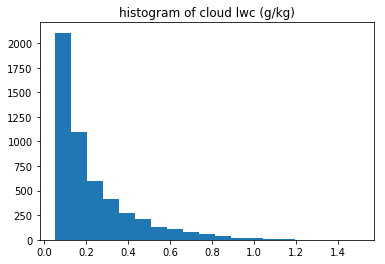

In [6]:
bins=np.linspace(0.05,1.5,20)
out=plt.hist(ql.flat,bins=bins)
plt.title('histogram of cloud lwc (g/kg)')

# Plotting three $h_m$ profiles

What does $h_m = c_p T + l_v q_v + gz$ look like in the boundary layer?

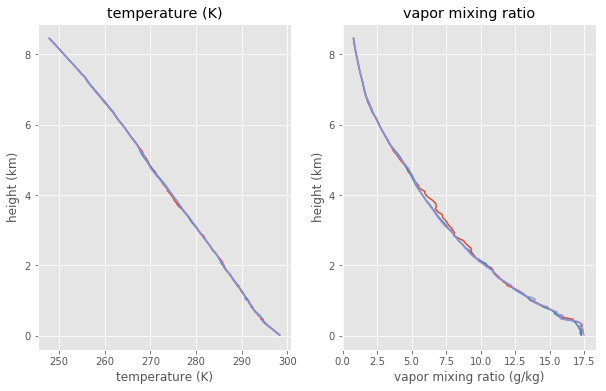

In [7]:
%matplotlib inline
plt.style.use('ggplot')
#
# plot 3 arbitrary columns
#
from matplotlib import pyplot as plt
import matplotlib
meter2km=1.e-3
random_xy=[(10,20),(80,40),(25,75)]
fig,ax=plt.subplots(1,2,figsize=(10,6))
for x,y in random_xy:
    temp_profile=the_temp[:,y, x]
    qv_profile=qv[:,y, x]
    out=ax[0].plot(temp_profile,the_height*meter2km) 
    out=ax[1].plot(qv_profile,the_height*meter2km) 
out=ax[0].set(xlabel='temperature (K)',ylabel='height (km)',title='temperature (K)')
out=ax[1].set(xlabel='vapor mixing ratio (g/kg)',ylabel='height (km)',title='vapor mixing ratio')

### moist static energy (J/kg)

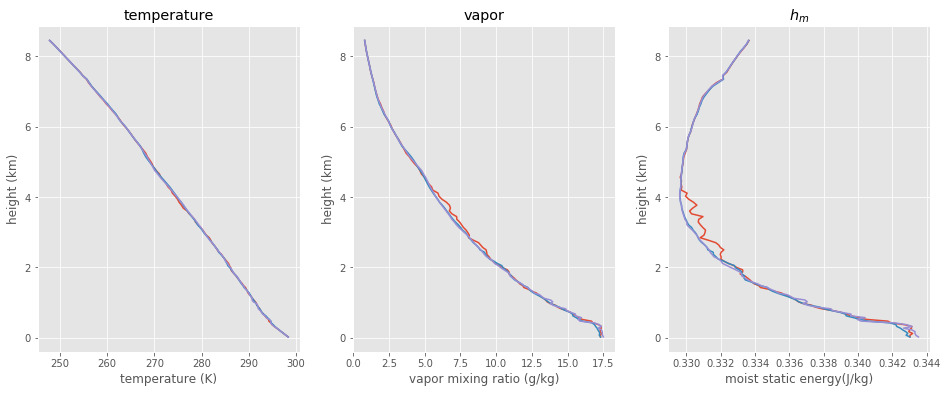

In [8]:
%matplotlib inline
#
# plot 3 arbitrary columns
#
from matplotlib import pyplot as plt
meter2km=1.e-3
lv=2.5e6
g=9.8
cpd=1004.
g2kg=1.e-3
random_xy=[(10,20),(80,40),(25,75)]
fig,ax=plt.subplots(1,3,figsize=(16,6))
for x,y in random_xy:
    temp_profile=the_temp[:,y, x]
    qv_profile=qv[:,y, x]
    hm_profile = cpd*temp_profile + lv*qv_profile*1.e-3 + g*the_height
    out=ax[0].plot(temp_profile,the_height*meter2km) 
    out=ax[1].plot(qv_profile,the_height*meter2km) 
    out=ax[2].plot(hm_profile*1.e-6,the_height*meter2km) 
out=ax[0].set(xlabel='temperature (K)',ylabel='height (km)',title='temperature')
out=ax[1].set(xlabel='vapor mixing ratio (g/kg)',ylabel='height (km)',title='vapor')
out=ax[2].set(xlabel='moist static energy(J/kg)',ylabel='height (km)',title='$h_m$')

### zoom in on bottom 1 km

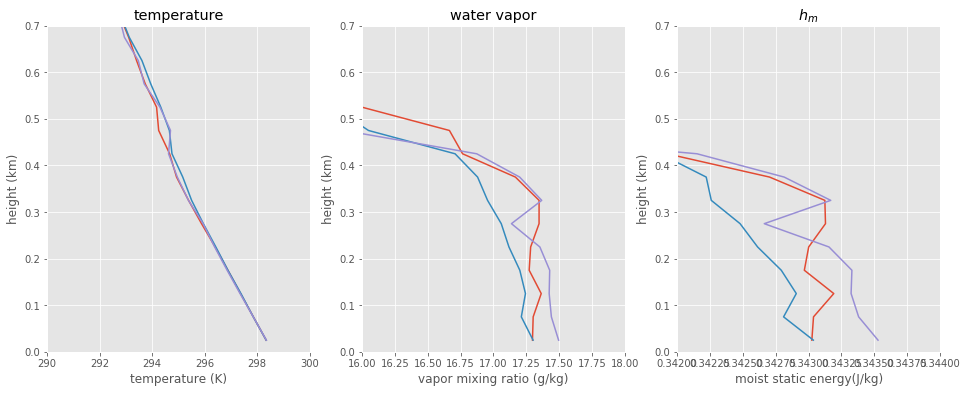

In [9]:
%matplotlib inline
#
# plot 3 arbitrary columns
#
from matplotlib import pyplot as plt
meter2km=1.e-3
lv=2.5e6
g=9.8
cpd=1004.
random_xy=[(10,20),(80,40),(25,75)]
fig,ax=plt.subplots(1,3,figsize=(16,6))
for x,y in random_xy:
    temp_profile=the_temp[:,y, x]
    qv_profile=qv[:,y, x]
    hm_profile = cpd*temp_profile + lv*qv_profile*1.e-3 + g*the_height
    out=ax[0].plot(temp_profile,the_height*meter2km) 
    out=ax[1].plot(qv_profile,the_height*meter2km) 
    out=ax[2].plot(hm_profile*1.e-6,the_height*meter2km) 
out=ax[0].set(xlabel='temperature (K)',ylabel='height (km)',title='temperature')
ax[0].set(xlim=(290,300))
ax[1].set(xlim=(16,18))
ax[2].set(xlim=(0.342,0.344))
out=ax[1].set(xlabel='vapor mixing ratio (g/kg)',ylabel='height (km)',title='water vapor')
out=ax[2].set(xlabel='moist static energy(J/kg)',ylabel='height (km)',title='$h_m$')
for the_ax in ax:
    the_ax.set(ylim=(0,0.7))

# Calculate the temperature and vapor fluxes

In [10]:
Rd=287  #J/kg/K
g2kg = 1.e-3
qv_avg,qv_perturb=do_reynolds(qv)
temp_avg,temp_perturb=do_reynolds(the_temp)
rho_avg=the_press/(Rd*temp_avg)
w_avg,w_perturb = do_reynolds(wvel)
T_flux=((w_perturb*temp_perturb).T*rho_avg).T*cpd  #W/m^2
qv_flux=((w_perturb*qv_perturb).T*rho_avg).T*lv*g2kg #W/m^2
T_flux_1d=(T_flux).mean(axis=2).mean(axis=1)
qv_flux_1d=(qv_flux).mean(axis=2).mean(axis=1)

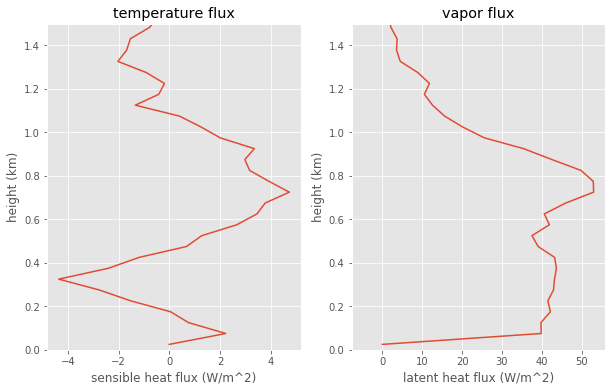

In [11]:
fig,ax=plt.subplots(1,2,figsize=(10,6))
ax[0].plot(T_flux_1d,the_height*meter2km)  
ax[0].set(xlabel='sensible heat flux (W/m^2)',ylabel='height (km)',title='temperature flux')
ax[1].plot(qv_flux_1d,the_height*meter2km)  
out=ax[1].set(xlabel='latent heat flux (W/m^2)',ylabel='height (km)',title='vapor flux')
out=[the_ax.set(ylim=(0,1.5)) for the_ax in ax]

### As expected, vapor transport dominates the energy flux in the warm marine boundary layer

### Closer examination of fluxes at 800 m

1\.  Look at simple histograms at one level

[Text(0.5,1,'latent heat flux at 800 m (W/m^2)')]

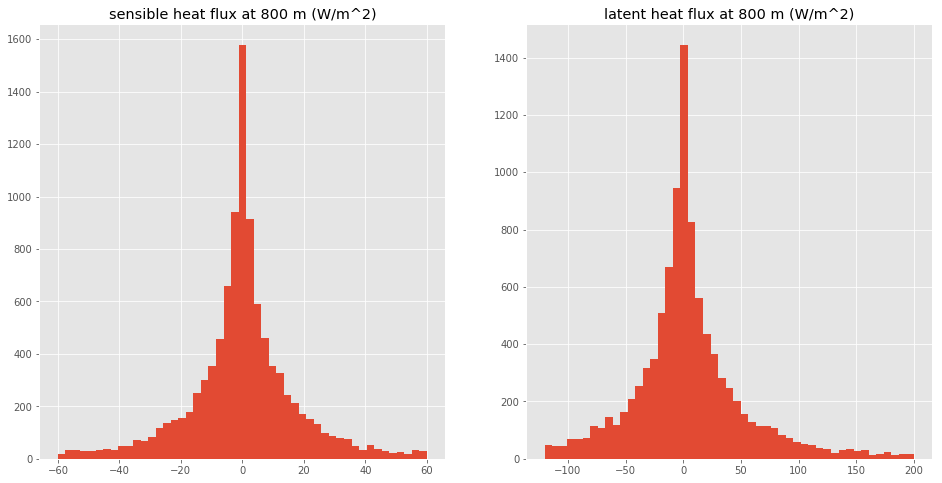

In [12]:
#
# select the level closest to 800 meters
# using searchsorted
#
zlev=np.searchsorted(the_height,800)
ql_800 = ql[zlev,:,:] == 0.
T_flux_800 = T_flux[zlev,:,:] #W/m^2
qv_flux_800 = qv_flux[zlev,:,:] #W/m^2
fig,ax = plt.subplots(1,2,figsize=(16,8))
out=ax[0].hist(T_flux_800.flat,bins=np.linspace(-60,60,50))
out=ax[1].hist(qv_flux_800.flat,bins=np.linspace(-120,200,50))
ax[0].set(title='sensible heat flux at 800 m (W/m^2)')
ax[1].set(title='latent heat flux at 800 m (W/m^2)')

### now do the same for the turbulent fluxes at that level in W/m^2

3.16179
49.82


[Text(0.5,0,'temperature flux (W/m^2) at 800 m')]

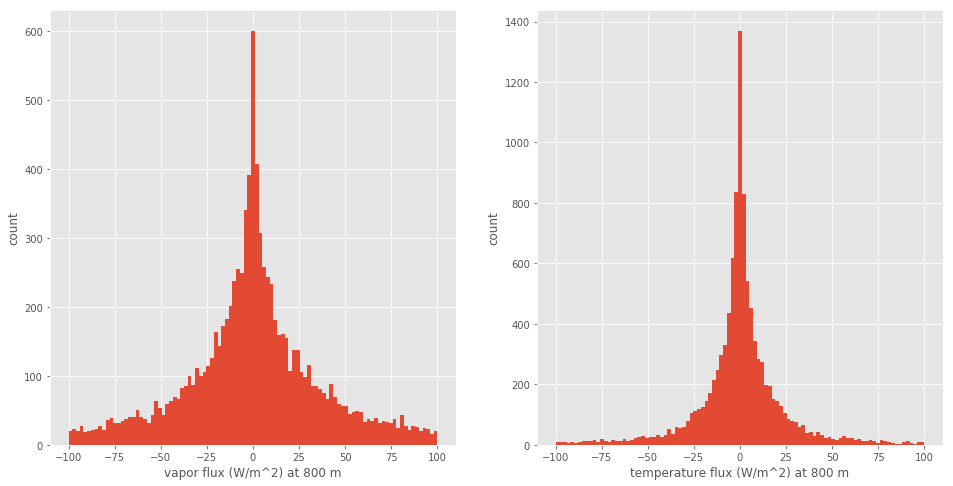

In [13]:
wpert_800=w_perturb[zlev,...]
Tpert_800=temp_perturb[zlev,...]
qvpert_800 = qv_perturb[zlev,...]
T_flux800=((wpert_800*Tpert_800)*rho_avg[zlev])*cpd  #W/m^2
qv_flux800=((wpert_800*qvpert_800)*rho_avg[zlev])*lv*g2kg #W/m^2
print(T_flux800.mean())
print(qv_flux800.mean())
fig,ax=plt.subplots(1,2,figsize=(16,8))
out=ax[0].hist(qv_flux800.flat,bins=np.linspace(-100,100,100))
out=ax[1].hist(T_flux800.flat,bins=np.linspace(-100,100,100))
[item.set(ylabel='count') for item in ax]
ax[0].set(xlabel='vapor flux (W/m^2) at 800 m')
ax[1].set(xlabel='temperature flux (W/m^2) at 800 m')

###  But there are some gridcells with huge flux values

Here's what happens when I don't limit the flux ranges

[Text(0,0.5,'sensible heat flux (W m^2)'),
 Text(0.5,0,'latent heat flux (W/m^2)')]

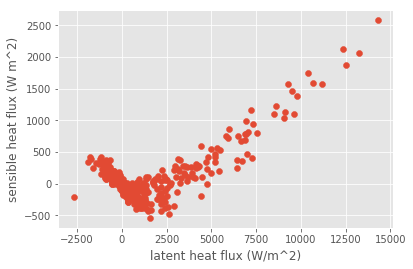

In [14]:
fig,ax=plt.subplots(1,1)
ax.scatter(qv_flux800.flat,T_flux800.flat)
ax.set(xlabel=r'latent heat flux (W/m^2)',ylabel=r'sensible heat flux (W m^2)')

### So what's up with these large fluxes?

The next cell demonstrates how to use logical indexing to find specific datapoints.  See
the [numpy documentation](http://docs.scipy.org/doc/numpy/reference/routines.logic.html)
for the full list of operators.  

Below, I use np.where to get a list of y,x indices where both fluxes are
bigger than 1000 W/m^2.  Then I zip them together into a list of pairs using
[argument list unpacking](https://docs.python.org/3.4/tutorial/controlflow.html#unpacking-argument-lists)  (also called 'splatting').  The '*' character changes a tuple like
a=(1,2,3) into individual arguments in a function call, so that

myfun(*a)

becomes

myfun(1,2,3)

and in the same way you can unpack dictionaries into keyword=value with '**':

```python
args={'one':1,'two':None}
myfun(**args)

becomes

myfun(one=1,two=None)
```

In [15]:
out=np.where(np.logical_and(qv_flux800 > 1000., T_flux800 > 1000))
#
#  unpack out into two individual lists and zip, then turn back
#  into a list
#
flux_list=list(zip(*out))
for item in flux_list:
    print(item)

(8, 88)
(27, 3)
(37, 4)
(37, 5)
(38, 4)
(39, 4)
(46, 13)
(47, 0)
(48, 37)
(48, 38)
(53, 20)
(53, 32)
(61, 43)
(70, 33)
(89, 33)
(91, 31)


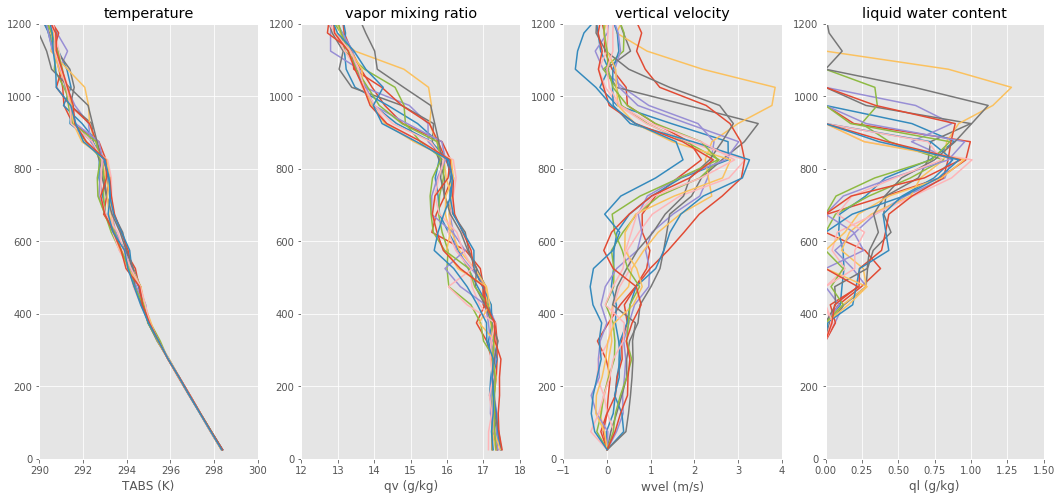

In [16]:
fig,ax=plt.subplots(1,4,figsize=(18,8))
for y,x in flux_list:
    ax[0].plot(the_temp[:,y,x],the_height)
    ax[1].plot(qv[:,y,x],the_height)
    ax[2].plot(wvel[:,y,x],the_height)
    ax[3].plot(ql[:,y,x],the_height)
ax[0].set(xlim=(290,300),xlabel='TABS (K)',title='temperature')
ax[1].set(xlim=(12,18),xlabel='qv (g/kg)',title='vapor mixing ratio')
ax[2].set(xlim=(-1,4),xlabel='wvel (m/s)',title='vertical velocity')
ax[3].set(xlim=(0,1.5),xlabel='ql (g/kg)',title='liquid water content')
out=[the_ax.set(ylim=(0,1200)) for the_ax in ax]

###  Conclusion: these large fluxes are coming from cloudy grid cells with coherent updrafts

They can't really be treated by Reynold's averaging.  We'll look at this in more detail later in the course

### Next:  joint distributions

We'll need to look at correlations between variables. One way to do that is with multi-dimensional histograms.  There is a plotting package called seaborn that can do this
for you:

```python
   conda install seaborn
   
```

Below we use seaborn.jointplot to print a fancy 2d histogram for the joint
distribution of the vapor and temperture fluxes

[Text(27.125,0.5,'temperature flux'), Text(0.5,33,'vapor flux')]

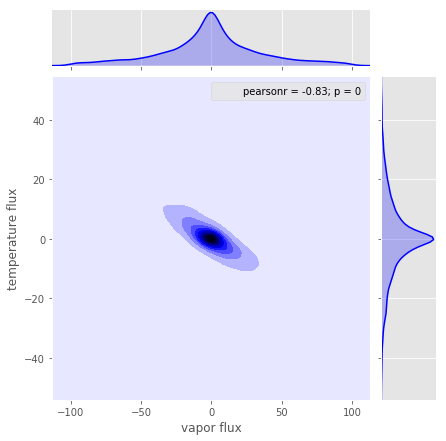

In [17]:
import seaborn as sns
#
#  limit the range f the data to be plotted
#
hit=((qv_flux800 > -100) & (qv_flux800 < 100)) &( (T_flux800 > -50) & (T_flux800 < 50))
g=sns.jointplot(x=qv_flux800[hit].flat,y=T_flux800[hit].flat,kind='kde',color='blue')
ax=g.ax_joint
ax.set(xlabel='vapor flux',ylabel='temperature flux')

For the above plot, note the wider range for the vapor flux, and the negative correlation
between temperature and vapor

### Writing our own histogram routine

There are a lot of cases where it's useful to roll our own histograms.  For example,
here's a $w^\prime$  $T^\prime$ plot with a lot of points

[Text(0,0.5,'$T^\\prime\\ (K)$'), Text(0.5,0,'$w^\\prime\\ (m/s)$')]

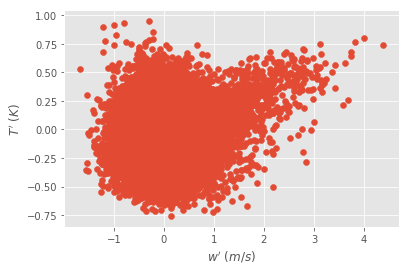

In [18]:
fig,ax=plt.subplots(1,1)
ax.scatter(w_perturb,temp_perturb)
ax.set(xlabel=r'$w^\prime\ (m/s)$',ylabel=r'$T^\prime\ (K)$')

Now histogram this by doing the following using the code (installation covered in class)

pull from github, which will bring in

[hist_numba.py](https://github.com/phaustin/atsc500/blob/master/a500_code/hist_numba.py)

To install this, cd to atsc500 and do:

```python
pip install -e .
```

To make it work, you will also need to do:

```python
conda install numba
```

which installs the numba jit ('just in time') compiler, that can produce code speedups of a factor of several hundred if we stick to a basic subset of 
[python](http://numba.pydata.org/numba-doc/0.21.0/reference/pysupported.html) and 
[numpy](http://numba.pydata.org/numba-doc/0.21.0/reference/numpysupported.html) features.

Numba is used [here](https://github.com/phaustin/atsc500/blob/master/a500/utils/hist_numba.py#L6-L38) to speed up the loop that counts the number of datapoints in
each 2-d bin


In [19]:
from a500.utils.hist_numba import hist2d
print(help(hist2d))

Help on function hist2d in module a500.utils.hist_numba:

hist2d(col_raw, row_raw, col_edges, row_edges)
    Produce a 2-d histogram (for example, of temperature (y) vs.
      vertical velocity (x) data)  binned into temperature,wvel
      bins
    input: row_raw,col_raw: data vectors of the row variable (temperature)
           and the column variable (wvel)
           col_edges, row_edges:  coordinates of the bin edges for each variables
    returns:  counts,col_centers,row_centers
    
    Example, given 10,000 temperature measurements to be binned into 20 bins, and
             20,000 wvel measurements to be binned into 10 bins, return
             counts as a [20,10]  array with the number of measurements that fall
             into each bin

None


### Now redo the wvel, T scatterplot as a 2-d histogram, plotting log10(counts)

[Text(0,0.5,'log10(counts)')]

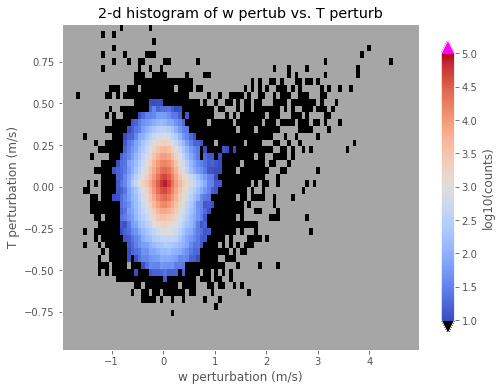

In [20]:

#
from matplotlib.colors import Normalize

wedges=np.linspace(-2,5,100)
Tedges=np.linspace(-1,1,50)
counts,row_centers,col_centers=hist2d(w_perturb.ravel(), 
                                       temp_perturb.ravel(),wedges,Tedges)
mask=np.isnan(counts)
counts=np.ma.array(counts,mask=mask)
fig,ax=plt.subplots(1,1,figsize=(8,6))
#
# we want to map 256 colors from the coolwarm palette  into the
# data range log10(counts) = 1 to log10(counts) = 5  (i.e. 10 to 100,000)
#
#  we also want to color empty bins grey, and show all bins that aren't empty
#  but fall outside of the range as either black (less than 10 counts) or magenta
#  (more than 100,000) counts
#
cmap=plt.get_cmap('coolwarm')
cmap.set_under('black')
cmap.set_over('magenta')
cmap.set_bad('0.65')
the_norm=Normalize(vmin=1,vmax=5)
cs=ax.pcolormesh(row_centers,col_centers,np.log10(counts),cmap=cmap,norm=the_norm)
ax.set(xlabel='w perturbation (m/s)',ylabel='T perturbation (m/s)',
       title='2-d histogram of w pertub vs. T perturb')
cbar=fig.colorbar(cs,shrink=0.9,extend='both')
cbar.ax.set(ylabel='log10(counts)')

[(40, 51),
 Text(0.5,0,'distance east (km)'),
 Text(0.5,1,'sensible heat flux in cloud')]

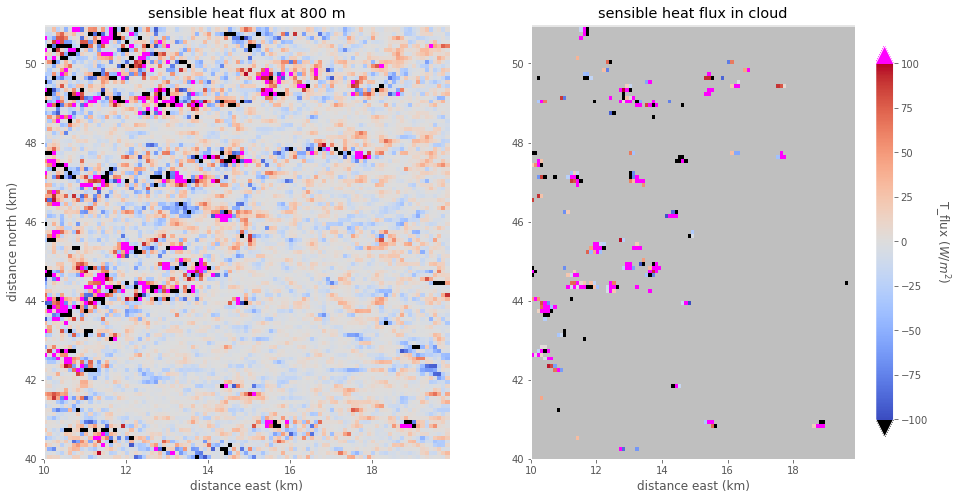

In [21]:
#
#  Make a color imaged with a scaled colormap
#
from matplotlib.colors import Normalize
#
# also get the cloud liquid water field at the same level
#
ql_800=ql[zlev,:,:]*lv*rho_avg[zlev]  #g/kg
# center the colorbar about 0
#
the_norm=Normalize(vmin=-100,vmax=100)

cmap=plt.get_cmap('coolwarm')
cmap.set_under('black')
cmap.set_over('magenta')
cmap.set_bad('0.75')
fig,ax=plt.subplots(1,2,figsize=(16,8))
cs=ax[0].pcolormesh(xvals*1.e-3,yvals*1.e-3,T_flux_800,cmap=cmap,norm=the_norm)
ax[0].set(ylim=(40,51),xlabel='distance east (km)',ylabel='distance north (km)',
          title='sensible heat flux at 800 m')
cbar=fig.colorbar(cs,shrink=0.9,extend='both')
out=cbar.ax.set(ylabel='T_flux ($W/m^2$)')
out[0].set(rotation=-90,va='bottom')
#
#  hide pixels with no liquid water
#
hit=ql_800 < 1.e-2
T_flux_masked=np.ma.array(T_flux_800,mask=hit)
cs=ax[1].pcolormesh(xvals*1.e-3,yvals*1.e-3,T_flux_masked,cmap=cmap,norm=the_norm)
ax[1].set(ylim=(40,51),title='sensible heat flux in cloud',xlabel='distance east (km)')